# CONTENTS

### 01) Import Libraries and Dataframe
### 02) Correlation Matrix Heatmap
### 03) Scatterplots
### 04) Pair Plot
### 05) Categorical Plot
### 06) Export Visualizations

# 01 Import Libraries and Dataframe

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.3.4'

In [3]:
#Automatically call visualizations
%matplotlib inline

In [4]:
#Import Data
path = r'/Users/Nick/Documents/CareerFoundry/Immersion-6/College-Equity'
df = pd.read_csv(os.path.join(path, '02-Data/college-equity-clean.csv'))

In [5]:
pd.set_option('display.max_columns', 200)

In [6]:
df.head()

,Unnamed: 0,name,tier,ownership_type,state,city,zip,unitid,student_body,fraction_students_men,fraction_students_women,fraction_students_white,fraction_students_black,fraction_students_hispanic,fraction_students_asian,fraction_students_native_american,fraction_students_pacific_islander,fraction_students_multiracial,fraction_students_non_resident,fraction_students_unknown_ethnicity,fraction_parent_income_q1,fraction_parent_income_q2,fraction_parent_income_q3,fraction_parent_income_q4,fraction_parent_income_q5,mean_parent_income,median_parent_income,fraction_child_income_q1,fraction_child_income_q2,fraction_child_income_q3,fraction_child_income_q4,fraction_child_income_q5,mean_child_income,median_child_income,percent_child_zero_income,mobility_rate,tuition_in_state,tuition_out_of_state,tuition_net,cost_of_attendance,pell_grant_rate,pell_aid_per_student,institutional_grant_aid_avg,fraction_students_with_debt,debt_median,debt_90_percentile,debt_75_percentile,debt_25_percentile,debt_10_percentile,online_only,completion_rate,student_income_6_years_mean,student_income_6_years_median,student_income_6_years_25_percentile,student_income_6_years_75_percentile,student_income_6_years_stdev,student_income_10_years_mean,student_income_10_years_median,student_income_10_years_25_percentile,student_income_10_years_75_percentile,student_income_10_years_stdev
0,0,ASA College,Two-year for-profit,Private for-profit,NY,Brooklyn,11201-9805,404994,4437.0,0.3678,0.6322,0.0471,0.3315,0.3980,0.0775,0.0009,0.0014,0.0133,0.1285,0.0018,0.443575,0.326790,0.143711,0.059707,0.026217,35390.39680,29000,0.171280,0.297217,0.251632,0.210021,0.069851,24916.14900,19700,0.160623,0.020034,12298.0,12298.0,14948.0,26546.0,0.7992,3578.4820,3218.60,0.5164,8500.0,19810.0,14193.0,3500.0,2000.0,0.0,0.3185,22300.0,18100.0,10300.0,31000.0,16800.0,29300.0,26100.0,13800.0,40400.0,21000.0
1,1,Abilene Christian University,Selective private,Private nonprofit,TX,Abilene,79699,222178,3572.0,0.4236,0.5764,0.6739,0.0798,0.1414,0.0090,0.0039,0.0000,0.0454,0.0423,0.0045,0.052441,0.101032,0.163936,0.258240,0.424351,138760.96980,101000,0.140065,0.132948,0.173277,0.246444,0.307266,50874.14613,40100,0.121246,0.014364,29450.0,29450.0,13974.0,41606.0,0.2595,940.7532,11832.39,0.5945,18500.0,37000.0,27500.0,6500.0,4750.0,0.0,0.6200,38900.0,35600.0,22500.0,50000.0,31300.0,48900.0,43000.0,26700.0,62700.0,38700.0
2,2,Abraham Baldwin Agricultural College,Nonselective four-year public,Public,GA,Tifton,31793-2601,138558,3244.0,0.4750,0.5250,0.7830,0.1239,0.0586,0.0071,0.0025,0.0003,0.0092,0.0151,0.0003,0.154555,0.187159,0.225497,0.236763,0.196027,80366.66127,66000,0.121950,0.179027,0.255329,0.273957,0.169737,35346.92997,32500,0.113069,0.014857,3394.0,9839.0,2359.0,11674.0,0.4629,1870.4520,1152.64,0.4831,5500.0,20750.0,12000.0,3500.0,2000.0,0.0,0.1618,29100.0,26300.0,15800.0,37900.0,19800.0,36300.0,32900.0,19300.0,47500.0,25000.0
3,3,Academy of Art University,Four-year for-profit,Private for-profit,CA,San Francisco,94105,108232,9885.0,0.4342,0.5658,0.2392,0.0685,0.1141,0.0804,0.0051,0.0058,0.0249,0.2523,0.2098,0.093524,0.122917,0.175349,0.211525,0.396684,166594.96960,92300,0.205866,0.193782,0.180868,0.158146,0.261338,39988.01721,27400,0.186393,0.016357,19740.0,19740.0,25086.0,35919.0,0.4008,1432.1950,4449.50,0.4933,12250.0,49500.0,31000.0,5500.0,3449.0,0.0,0.3111,32800.0,26900.0,13700.0,44200.0,29600.0,47300.0,38600.0,19100.0,64000.0,43500.0
4,4,Adams State University,Selective public,Public,CO,Alamosa,81101,126182,2110.0,0.5156,0.4844,0.5071,0.0706,0.3180,0.0109,0.0152,0.0043,0.0450,0.0000,0.0289,0.129224,0.185504,0.248429,0.260876,0.175967,76121.81634,67200,0.121248,0.159078,0.243862,0.272265,0.203548,38010.81341,34100,0.112288,0.018845,8014.0,18814.0,6568.0,19043.0,0.5175,2758.5980,2502.68,0.6472,9500.0,31000.0,19680.0,4657.0,2750.0,0.0,0.2125,28800.0,26700.0,15600.0,37300.0,19600.0,38100.0,35200.0,21200.0,50800.0,25900.0


In [7]:
ced = df.drop(columns = ['Unnamed: 0'])

# 02 Correlation Matrix Heatmap

In [8]:
ced_corr = ced[['median_parent_income', 'cost_of_attendance', 'pell_aid_per_student', 'institutional_grant_aid_avg', 'debt_median', 'completion_rate', 'student_income_6_years_median', 'student_income_10_years_median']]

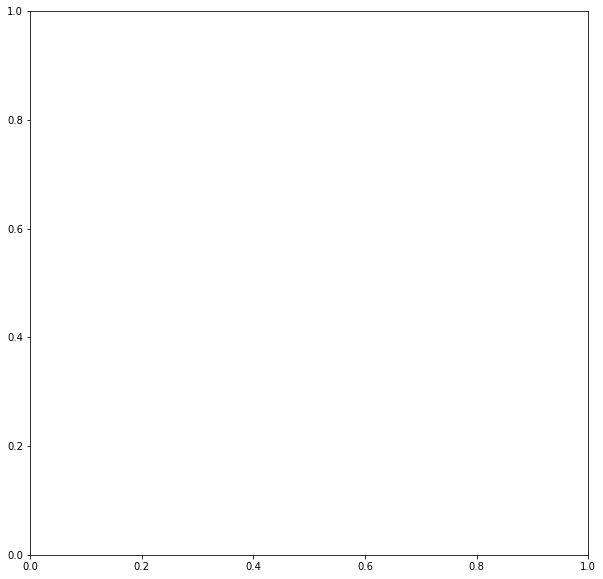

In [9]:
#Blank plot
f,ax = plt.subplots(figsize = (10,10))

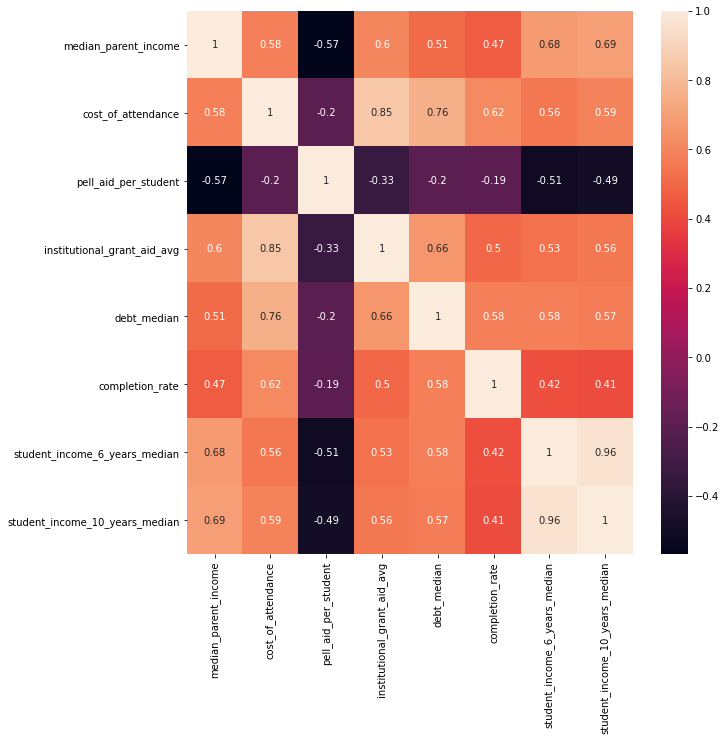

In [10]:
#Create correlation heatmap
corr = sns.heatmap(ced_corr.corr(), annot = True, ax = ax)
corr.figure

#### Correlation coefficients that are closer to 1 or -1 indicate a stronger relationship than those that are closer to zero. When equal to 1, across the left-to-right diagonal, the variable is paired with itself, so the correlation is perfect. The relationships that are worth exploring further with scatterplots are student_income_10_years_median v. median_parent_income, institutional_grant_aid_avg v. cost_of_attendance, and debt_median v. cost_of_attendance.

# 03 Scatterplots

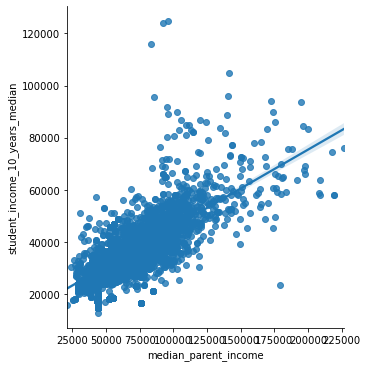

In [11]:
#student_income_10_years_median v. mean_parent_income
sca_1 = sns.lmplot(x = 'median_parent_income', y = 'student_income_10_years_median', data = ced_corr)

#### The correlation coefficient is 0.69, indicating a strong, positive relationship; students with more wealthy parents tend to earn more after graduation. Also, there is a student income ceiling near 60k for those whose parents made less than around 85k (medians each).

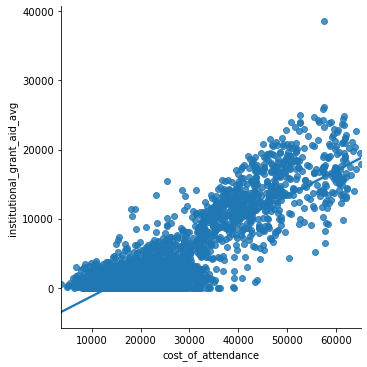

In [12]:
#institutional_grant_aid_avg v. cost_of_attendance
sca_2 = sns.lmplot(x = 'cost_of_attendance', y = 'institutional_grant_aid_avg', data = ced_corr)

#### The correlation coefficient is 0.85, indicating a rather strong, positive relationship. This plot shows that more expensive schools tend to lend more grant aid.

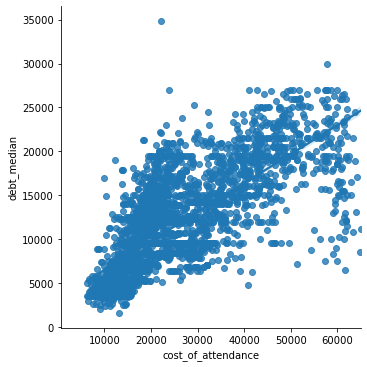

In [13]:
#debt_median v. cost_of_attendance
sca_3 = sns.lmplot(x = 'cost_of_attendance', y = 'debt_median', data = ced_corr)

#### The correlation coefficient is 0.76, indicating a strong, positive relationship. Generally, a more expensive college has students with higher amounts of debt. From the 5k to 30k cost of attendance, the median debt trend is much more steep than the overall trend.

# 04 Pair Plot

In [14]:
#Pair Plot of entire dataset
#pplot = sns.pairplot(ced)
#Too big

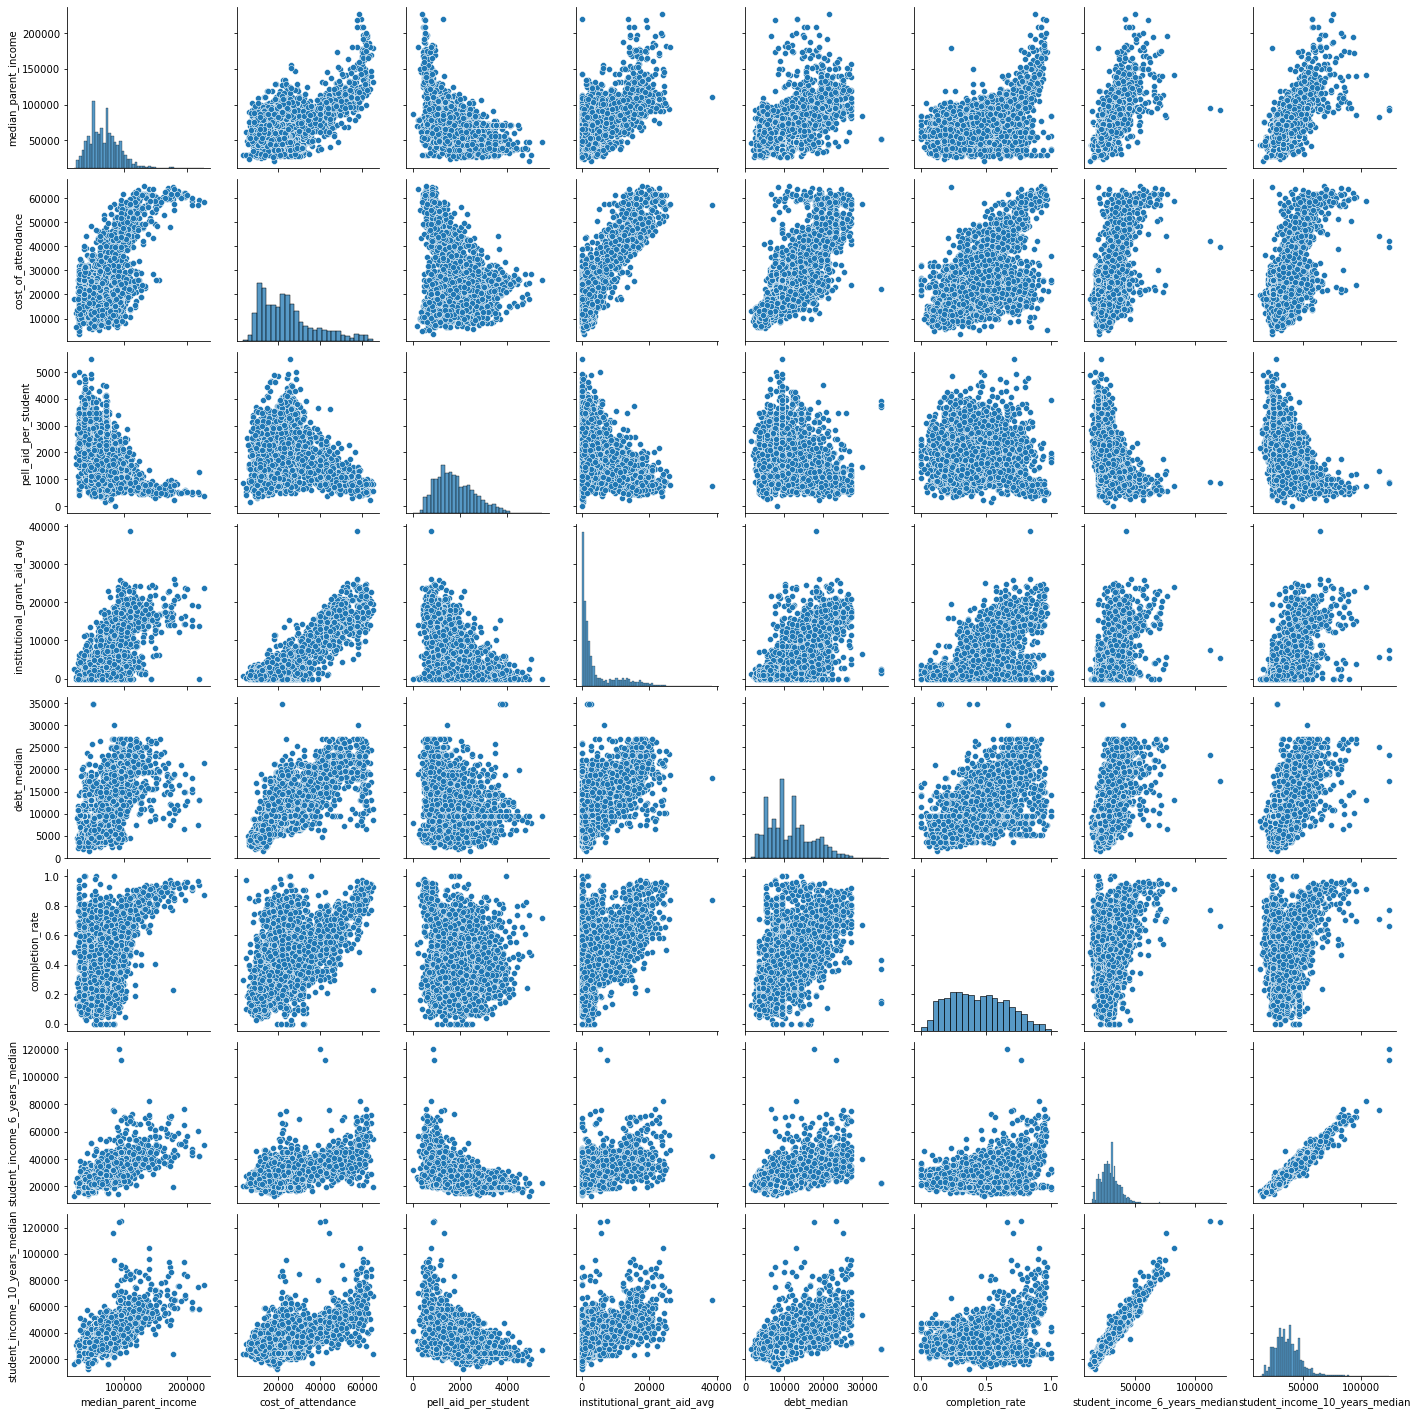

In [15]:
#Pair Plot of subset
pplot_1 = sns.pairplot(ced_corr)

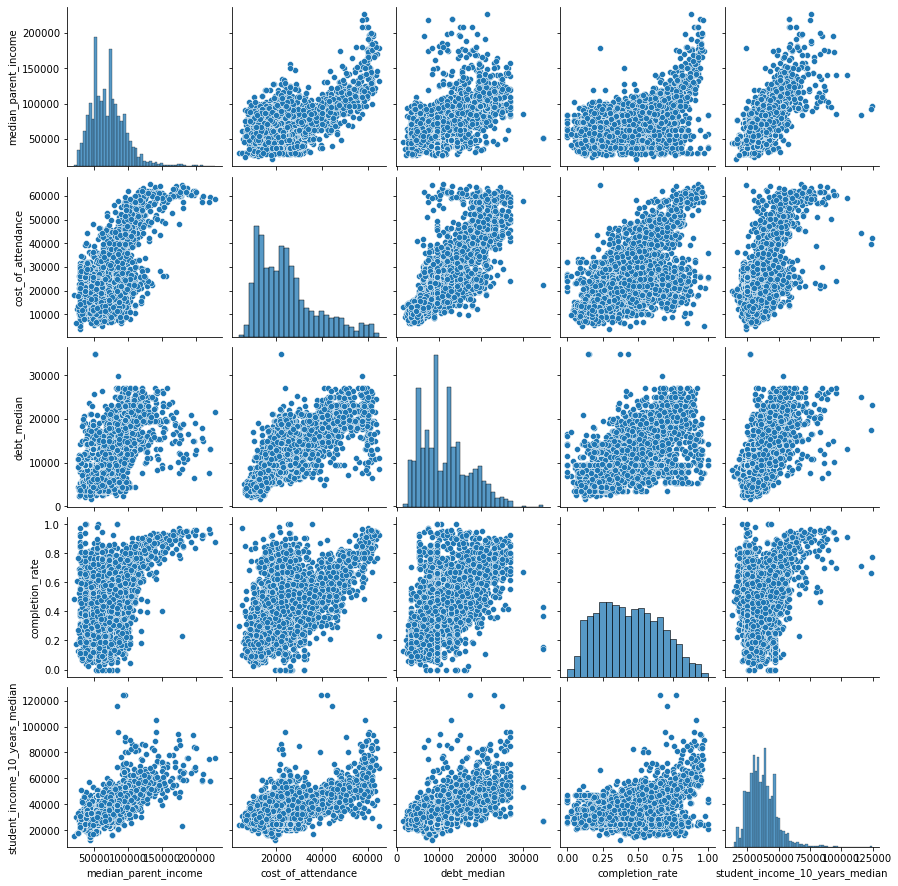

In [16]:
#Still a bit big, next try
ced_pp = ced[['median_parent_income', 'cost_of_attendance', 'debt_median', 'completion_rate','student_income_10_years_median']]
pplot_2 = sns.pairplot(ced_pp)

#### All the histograms of the above variables are right skewed except for the completion rate, which is normally distributed. Median parent income, cost of attendance, and student income after 10 years are the most interesting variables, as they have more strong correlations with other variables.

# 05 Categorical Plot

In [17]:
df['tier'].value_counts(dropna = False)

Two-year (public and private not-for-profit)     833
Selective private                                648
Four-year for-profit                             594
Selective public                                 563
Less than two-year schools of any type           335
Two-year for-profit                              247
Nonselective four-year private not-for-profit    127
Nonselective four-year public                     76
Highly selective private                          75
Highly selective public                           68
Other elite schools (public and private)          66
Ivy Plus                                          13
Name: tier, dtype: int64

In [18]:
df['ownership_type'].value_counts(dropna = False)

Public                1544
Private for-profit    1147
Private nonprofit      954
Name: ownership_type, dtype: int64

## 05.01 Categorical Plot of Median Student Income after 10 Years vs. Tier

In [19]:
#Find distribution of student_income_10_years_median
#to inform categorization
df['student_income_10_years_median'].describe()

count      3616.000000
mean      37163.053097
std       11515.068772
min       12700.000000
25%       29300.000000
50%       35900.000000
75%       43500.000000
max      124700.000000
Name: student_income_10_years_median, dtype: float64

In [20]:
#Define categories for student_income_10_years_median

#Q1 (< 29300)
df.loc[df['student_income_10_years_median'] < 29300, 'Grad_Income_Category'] = 'Quartile 1'
#Q2 (>= 29300 and < 35900)
df.loc[(df['student_income_10_years_median'] >= 29300) & (df['student_income_10_years_median'] < 35900), 'Grad_Income_Category'] = 'Quartile 2'
#Q3 (>= 35900 and < 43500)
df.loc[(df['student_income_10_years_median'] >= 35900) & (df['student_income_10_years_median'] < 43500), 'Grad_Income_Category'] = 'Quartile 3'
#Q4 (>= 43500)
df.loc[df['student_income_10_years_median'] >= 43500, 'Grad_Income_Category'] = 'Quartile 4'

In [21]:
#Check category value count
df['Grad_Income_Category'].value_counts(dropna = False)

Quartile 2    909
Quartile 3    908
Quartile 4    907
Quartile 1    892
NaN            29
Name: Grad_Income_Category, dtype: int64

In [22]:
#Check that null values stem from student income null values
df['student_income_10_years_median'].isna().sum()

29

#### There are 29 null values in the student income column, which causes the 29 null values in the grad income category.

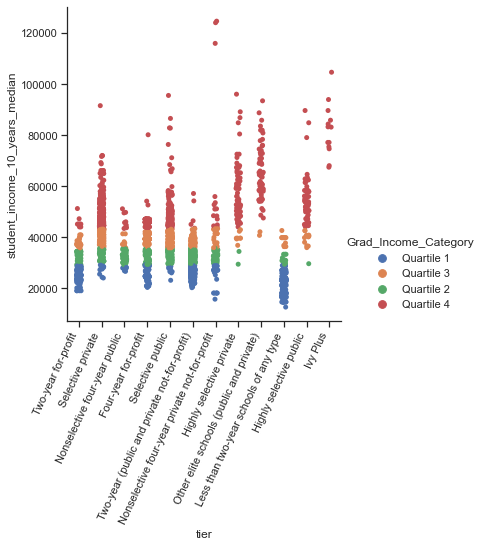

In [23]:
#Create categorical plot
sns.set(style="ticks")
cat_1 = sns.catplot(x="tier", y="student_income_10_years_median"
                , hue="Grad_Income_Category", data=df)
cat_1.set_xticklabels(rotation=65, horizontalalignment='right')

#### Some school tiers have median graduate income floors near the overall median, while the two year or less schools have a ceiling near the 75th percentile.

## 05.02 Categorical Plot of Median Student Income after 10 Years vs. Ownership Type

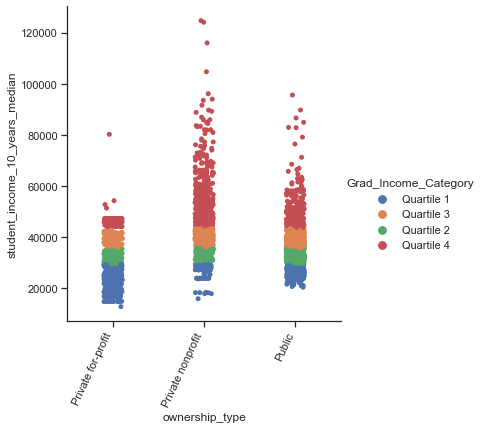

In [24]:
#Create categorical plot
sns.set(style="ticks")
cat_2 = sns.catplot(x="ownership_type", y="student_income_10_years_median"
                , hue="Grad_Income_Category", data=df)
cat_2.set_xticklabels(rotation=65, horizontalalignment='right')

#### It appears that median graduate incomes are lowest in private for-profit and greatest in private nonprofit. Private nonprofit colleges have a lesser amount of Q1 grad income median values than public colleges and more Q4 values that are greater than 60,000.

# 06 Export Visualizations

In [25]:
corr.figure.savefig(os.path.join(path, '04-Analysis/Visualizations/corr-heatmap.png'))

In [27]:
sca_1.savefig(os.path.join(path, '04-Analysis/Visualizations/grad-v-parent-income.png'))

In [28]:
sca_2.savefig(os.path.join(path, '04-Analysis/Visualizations/grant-v-cost.png'))

In [29]:
sca_3.savefig(os.path.join(path, '04-Analysis/Visualizations/debt-v-cost.png'))

In [30]:
pplot_2.savefig(os.path.join(path, '04-Analysis/Visualizations/pair-plot.png'))

In [31]:
cat_1.savefig(os.path.join(path, '04-Analysis/Visualizations/gradincome-v-tier.png'))

In [32]:
cat_2.savefig(os.path.join(path, '04-Analysis/Visualizations/gradincome-v-ownership.png'))